## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Open the example link and download the source code from Github repository.
### C. Sign up for <a href="https://developer.twitter.com/en/support/twitter-api/developer-account">a developer account in Twitter</a>
### D. Copy, paste and modify the python code file in the notebook

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 5.4 MB/s eta 0:00:0000:01
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 30.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 79.5 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=fd1afdea73b3cdb61e8ffb080810f0b177051d6b11a4b9d698bde22a0cd05b8f
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690fc442fef6d3221

In [3]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...


True

# Step 2: Authentication for Twitter API

In [4]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [5]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  ucm
Please enter how many tweets to analyze:  30


In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  30
positive number:  3
negative number:  7
neutral number:  20


In [7]:
tweet_list[0:20]

,0
0,RT @StripMarvel: No voy a decir quién creo que...
1,@damian2s is the right man for the job. Got to...
2,RT @MizaFreakk: Acabo de ver #GuardiansOfTheGa...
3,@ucm_sa ❤️❤️❤️
4,これ上手くまとまってきてて、第3案まで用意できてる。 https://t.co/5MGSa2...
5,RT @lizet1984: @ss_ucm \nLa superación profeso...
6,インスタのストーリーにURL貼れないバグ、1ヶ月経っても直らない。
7,#spiderman #marvel #ucm #comics #marvelsspider...
8,RT @crissara_: en siete días volvemos a la gue...
9,"@VanMaddle1 Ostia, que salió Egghead en el UCM..."


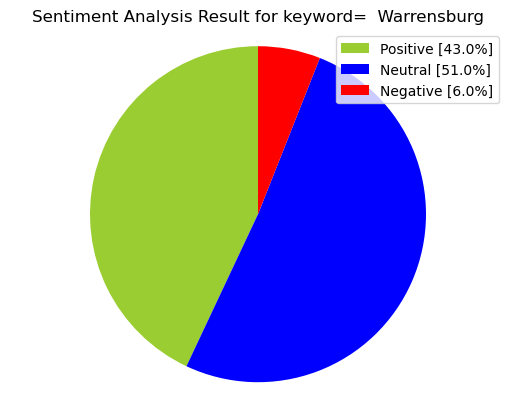

In [7]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [8]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [9]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @StripMarvel: No voy a decir quién creo que...,RT @StripMarvel: No voy a decir quién creo que...
1,@damian2s is the right man for the job. Got to...,@damian2s is the right man for the job. Got to...
2,RT @MizaFreakk: Acabo de ver #GuardiansOfTheGa...,RT @MizaFreakk: Acabo de ver #GuardiansOfTheGa...
3,@ucm_sa ❤️❤️❤️,@ucm_sa ❤️❤️❤️
4,これ上手くまとまってきてて、第3案まで用意できてる。 https://t.co/5MGSa2...,これ上手くまとまってきてて、第3案まで用意できてる。 https://t.co/5MGSa2...
5,RT @lizet1984: @ss_ucm \nLa superación profeso...,RT @lizet1984: @ss_ucm \nLa superación profeso...
6,インスタのストーリーにURL貼れないバグ、1ヶ月経っても直らない。,インスタのストーリーにURL貼れないバグ、1ヶ月経っても直らない。
7,#spiderman #marvel #ucm #comics #marvelsspider...,#spiderman #marvel #ucm #comics #marvelsspider...
8,RT @crissara_: en siete días volvemos a la gue...,RT @crissara_: en siete días volvemos a la gue...
9,"@VanMaddle1 Ostia, que salió Egghead en el UCM...","@VanMaddle1 Ostia, que salió Egghead en el UCM..."


In [10]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @StripMarvel: No voy a decir quién creo que...,no voy a decir qui n creo que es porque al fi...
1,@damian2s is the right man for the job. Got to...,is the right man for the job got to play fo...
2,RT @MizaFreakk: Acabo de ver #GuardiansOfTheGa...,acabo de ver guardiansofthegalaxyvol3 y solo...
3,@ucm_sa ❤️❤️❤️,sa
4,これ上手くまとまってきてて、第3案まで用意できてる。 https://t.co/5MGSa2...,3
5,RT @lizet1984: @ss_ucm \nLa superación profeso...,ucm la superaci n profesoral es un objetiv...
6,インスタのストーリーにURL貼れないバグ、1ヶ月経っても直らない。,url 1
7,#spiderman #marvel #ucm #comics #marvelsspider...,spiderman marvel ucm comics marvelsspider...
8,RT @crissara_: en siete días volvemos a la gue...,en siete d as volvemos a la guerra ucm a en...
9,"@VanMaddle1 Ostia, que salió Egghead en el UCM...",ostia que sali egghead en el ucm pues b...


In [11]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_30259/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @StripMarvel: No voy a decir quién creo que...,no voy a decir qui n creo que es porque al fi...,0.000000,1.000000,negative,0.234,0.766,0.000,-0.7003
1,@damian2s is the right man for the job. Got to...,is the right man for the job got to play fo...,0.285714,0.535714,positive,0.000,0.902,0.098,0.3400
2,RT @MizaFreakk: Acabo de ver #GuardiansOfTheGa...,acabo de ver guardiansofthegalaxyvol3 y solo...,-1.000000,1.000000,negative,0.157,0.717,0.126,-0.1779
3,@ucm_sa ❤️❤️❤️,sa,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,これ上手くまとまってきてて、第3案まで用意できてる。 https://t.co/5MGSa2...,3,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
5,RT @lizet1984: @ss_ucm \nLa superación profeso...,ucm la superaci n profesoral es un objetiv...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,インスタのストーリーにURL貼れないバグ、1ヶ月経っても直らない。,url 1,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,#spiderman #marvel #ucm #comics #marvelsspider...,spiderman marvel ucm comics marvelsspider...,0.000000,0.000000,positive,0.000,0.682,0.318,0.4215
8,RT @crissara_: en siete días volvemos a la gue...,en siete d as volvemos a la guerra ucm a en...,0.000000,0.000000,negative,0.104,0.896,0.000,-0.2960
9,"@VanMaddle1 Ostia, que salió Egghead en el UCM...",ostia que sali egghead en el ucm pues b...,0.000000,0.100000,neutral,0.000,1.000,0.000,0.0000


In [12]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [13]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,16,57.14
negative,7,25.00
positive,5,17.86


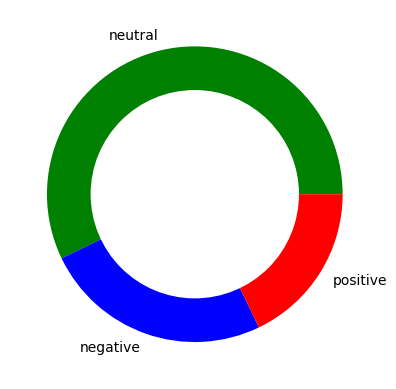

In [15]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



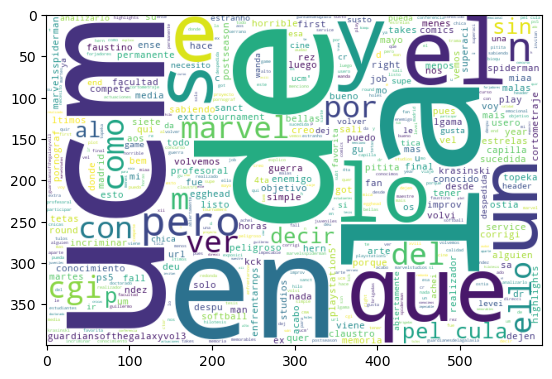

In [17]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

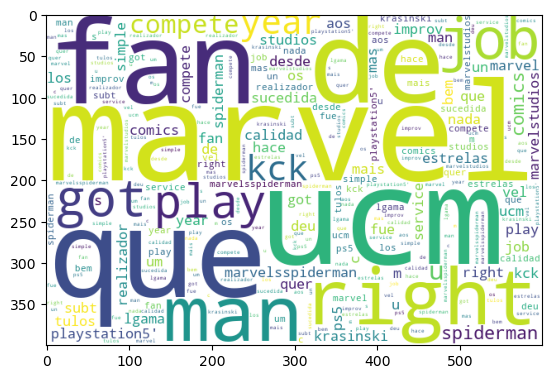

In [18]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

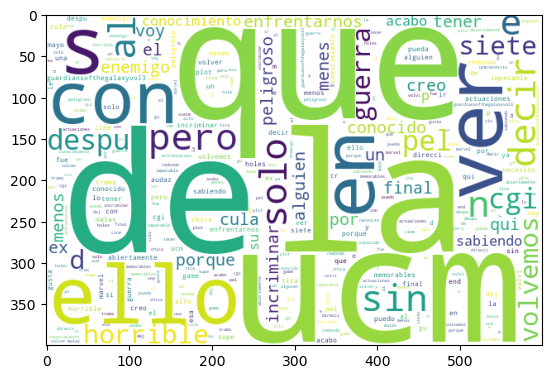

In [19]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

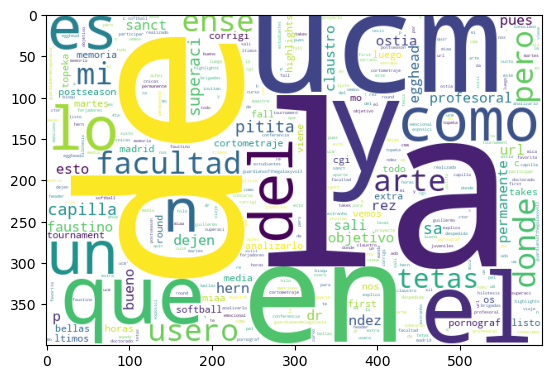

In [20]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)